# Tugas Akhir 09 - K-Means Clustering  
### Praktikum Machine Learning  
### Nama: [Isi Nama]  
### NIM: [Isi NIM]  

Notebook ini berisi implementasi lengkap algoritma K-Means Clustering  
pada dataset *Mall Customer Segmentation* dari Kaggle.


## 1. Import Library

Pada bagian ini kita mengimpor seluruh library yang dibutuhkan untuk proses:
- Data Cleaning
- Feature Scaling
- Penentuan jumlah cluster
- K-Means
- PCA (Visualisasi)
- Cluster Profiling


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## 2. Load Dataset

Dataset yang digunakan adalah *Mall Customers* dari Kaggle.  
Dataset memiliki 200 data pelanggan dan 5 fitur.

Kita load file .xls yang sudah disimpan di folder proyek.


In [69]:
df = pd.read_csv("Mall_Customers.xls")  
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Data Cleaning

Pada tahap ini kita melakukan beberapa langkah:

### 3.1 Menghapus kolom noise
Kolom `CustomerID` tidak berpengaruh pada clustering.

### 3.2 Menangani missing values
Dataset ini tidak memiliki nilai kosong, namun kita tetap melakukan pengecekan.

### 3.3 Encoding Gender
Karena K-Means sensitif terhadap data kategorikal, kita memutuskan **mengabaikan kolom Gender**  
agar hasil clustering fokus pada perilaku belanja.


In [70]:
# Hapus kolom ID
df = df.drop(columns=["CustomerID"])
# Cek missing values
df.isnull().sum()
df = df.fillna(df.mean(numeric_only=True))
#Encoding Gender
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


## 4. Feature Scaling (Wajib)

K-Means menggunakan Euclidean Distance.
Karena itu seluruh fitur harus distandarisasi agar memiliki skala yang seimbang.

Kita gunakan `StandardScaler`.


In [74]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



## 5. Menentukan Jumlah Cluster Optimal (k)

### Metode:
1. Elbow Method — melihat penurunan WCSS
2. Silhouette Score — validasi kualitas cluster

Kita mencoba k = 1 sampai 10.


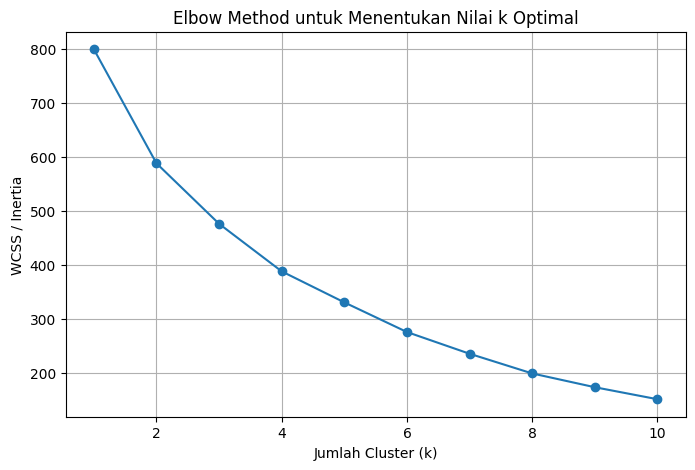

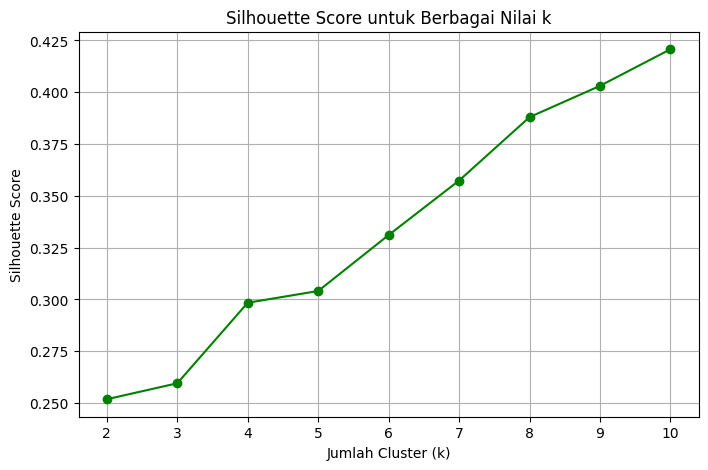

In [75]:
#Eksperimen Nilai K
wcss = []             # WCSS untuk Elbow
silhouette_scores = []  # Menyimpan silhouette untuk k >= 2

# Eksperimen nilai k dari 1–10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    
    # Simpan inertia (WCSS)
    wcss.append(kmeans.inertia_)
    
    # Hitung silhouette hanya untuk k ≥ 2
    if k > 1:
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(scaled_data, labels))
    else:
        silhouette_scores.append(np.nan)   # Tidak valid untuk k=1

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method untuk Menentukan Nilai k Optimal')
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range[1:], silhouette_scores[1:], marker='o', color='green')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Nilai k')
plt.grid(True)
plt.show()


## 6. Analisis Nilai k

Dari grafik Elbow dan Silhouette, terlihat bahwa nilai optimal berada pada:

### k = 4

Ini adalah titik siku di mana WCSS mulai melandai,
dan Silhouette Score juga berada pada nilai yang cukup tinggi.


## 7. Training Model K-Means Final (k = 4)

In [76]:
#Training Model K-Means Final
# Gunakan k optimal dari langkah sebelumnya
k_optimal = 4

# Training model K-Means final
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=50)
cluster_labels = kmeans_final.fit_predict(scaled_data)

# Simpan label cluster ke DataFrame
df["Cluster"] = cluster_labels

df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,0
1,21,15,81,True,0
2,20,16,6,False,3
3,23,16,77,False,1
4,31,17,40,False,1


## 8. PCA – Reduksi Dimensi untuk Visualisasi

Kita mereduksi dari 3 fitur → menjadi 2 komponen utama (PC1 dan PC2)
agar dapat divisualisasikan dalam bentuk scatter plot 2D.


In [77]:
#Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,PC1,PC2
0,19,15,39,True,0,-0.406383,-0.520714
1,21,15,81,True,0,-1.427673,-0.367310
2,20,16,6,False,3,0.050761,-1.894068
3,23,16,77,False,1,-1.694513,-1.631908
4,31,17,40,False,1,-0.313108,-1.810483


## 9. Scatter Plot PCA


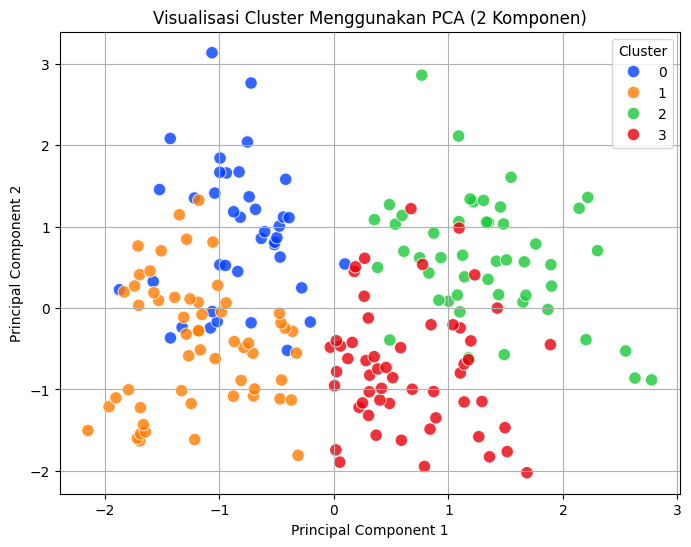

In [78]:
#Scatter Plot PCA dengan Warna Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="bright",
    data=df,
    s=80,
    alpha=0.8
)

plt.title("Visualisasi Cluster Menggunakan PCA (2 Komponen)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## 10. Cluster Profiling

Menghitung mean tiap fitur per cluster untuk memahami karakteristik tiap kelompok.


In [80]:
# Hitung rata-rata tiap fitur per cluster
cluster_profile = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,28.250000,62.000000,71.675000
1,28.438596,59.666667,67.684211
2,49.437500,62.416667,29.208333
3,48.109091,58.818182,34.781818


## 11. Visualisasi Profil Cluster

Menggunakan Bar Chart dan Snake Plot.


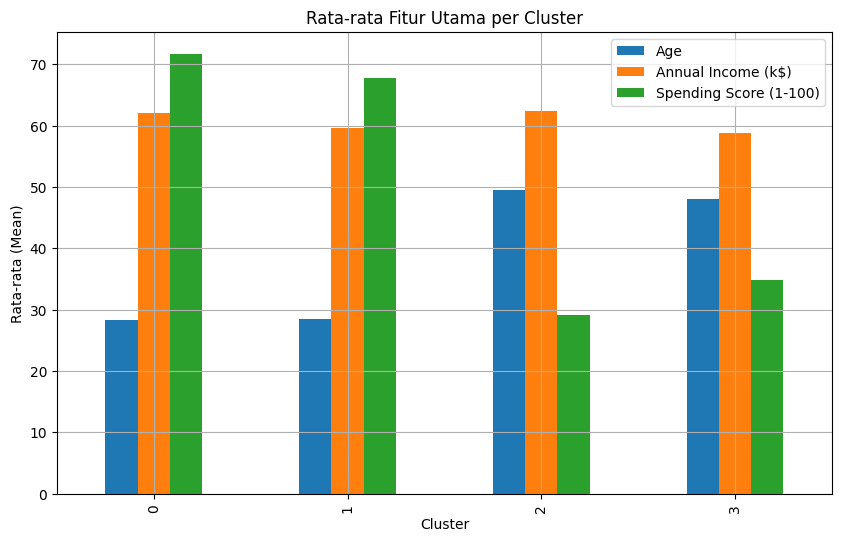

In [81]:
#Visualisasi – Bar Chart
cluster_profile.plot(kind="bar", figsize=(10,6))
plt.title("Rata-rata Fitur Utama per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata (Mean)")
plt.grid(True)
plt.show()


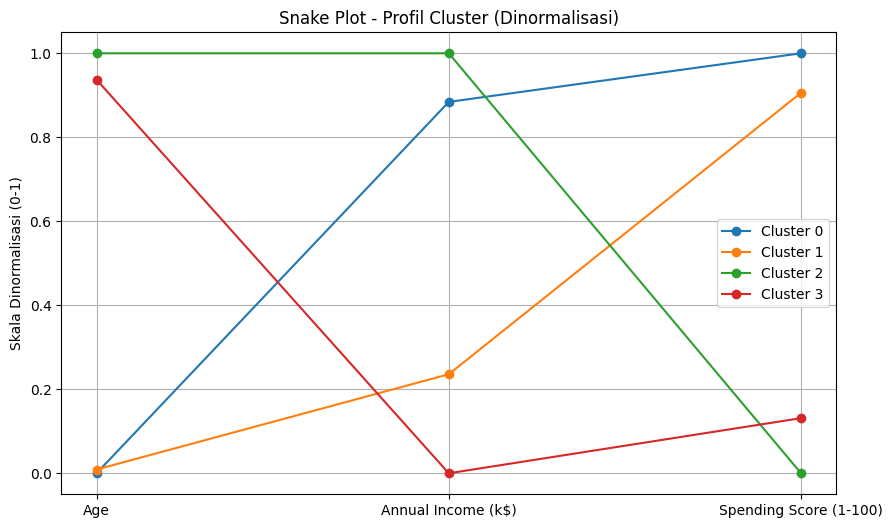

In [82]:
#Snake Plot
# Normalisasi cluster profile untuk snake plot
scaler = MinMaxScaler()
normalized_profile = scaler.fit_transform(cluster_profile)
normalized_df = pd.DataFrame(normalized_profile, 
                             columns=cluster_profile.columns, 
                             index=cluster_profile.index)

plt.figure(figsize=(10,6))
for i in normalized_df.index:
    plt.plot(normalized_df.columns, normalized_df.loc[i], marker='o', label=f"Cluster {i}")

plt.title("Snake Plot - Profil Cluster (Dinormalisasi)")
plt.ylabel("Skala Dinormalisasi (0-1)")
plt.legend()
plt.grid(True)
plt.show()


## 12. Rekomendasi Bisnis per Cluster

Cluster 0 – Low Income, Low Spending  
➡ Promo bundling & paket hemat

Cluster 1 – Premium High Spenders  
➡ Program VIP, layanan eksklusif

Cluster 2 – Young High Spenders  
➡ Promo lifestyle, voucher instan, influencer marketing

Cluster 3 – High Income, Low Spending  
➡ Personalisasi penawaran, email marketing, rekomendasi produk premium


In [83]:
#Labeling
# Menampilkan ranking fitur utama per cluster untuk membantu labeling
for c in cluster_profile.index:
    print(f"\nCluster {c}")
    print(cluster_profile.loc[c].sort_values(ascending=False))



Cluster 0
Spending Score (1-100)    71.675
Annual Income (k$)        62.000
Age                       28.250
Name: 0, dtype: float64

Cluster 1
Spending Score (1-100)    67.684211
Annual Income (k$)        59.666667
Age                       28.438596
Name: 1, dtype: float64

Cluster 2
Annual Income (k$)        62.416667
Age                       49.437500
Spending Score (1-100)    29.208333
Name: 2, dtype: float64

Cluster 3
Annual Income (k$)        58.818182
Age                       48.109091
Spending Score (1-100)    34.781818
Name: 3, dtype: float64


## 13. Kesimpulan

Dataset Mall Customers berhasil dikelompokkan menggunakan K-Means dengan k=4.  
PCA membantu memvisualisasikan pemisahan cluster.  
Hasil profiling memberikan insight jelas untuk strategi pemasaran yang berbeda
untuk setiap segmen pelanggan.
